Ketapang

Iterasi 1

Cluster 0, Drone 1, Route: ([0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0], [2, 3, 4, 24, 25, 26, 27, 28, 29, 30])
Cluster 0, Drone 2, Route: ([0, 4, 0], [1])
Cluster 1, Drone 1, Route: ([1, 56, 55, 51, 54, 53, 74, 18, 15, 62, 21, 23, 22, 63, 50, 65, 66, 64, 26, 25, 24, 75, 1], [12, 15, 18, 19, 20, 21, 22, 23, 47, 48, 50, 51, 52, 53, 59, 60, 61, 62, 63, 71, 72])
Cluster 1, Drone 2, Route: ([1, 52, 13, 12, 10, 58, 57, 9, 60, 61, 20, 8, 59, 11, 14, 16, 17, 19, 1], [5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 49, 54, 55, 56, 57, 58])
Cluster 2, Drone 1, Route: ([2, 41, 40, 3, 34, 39, 2], [0, 31, 36, 37, 38])
Cluster 2, Drone 2, Route: ([2, 69, 67, 68, 72, 73, 71, 48, 38, 49, 43, 42, 47, 44, 46, 45, 35, 37, 36, 70, 2], [32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 45, 46, 64, 65, 66, 67, 68, 69, 70])

=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H30 -> H24 -> H25 -> H26 -> H29 -> H27 -> H28 -> R0
    

c:\Uni\softcomp\ls.py:227: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(


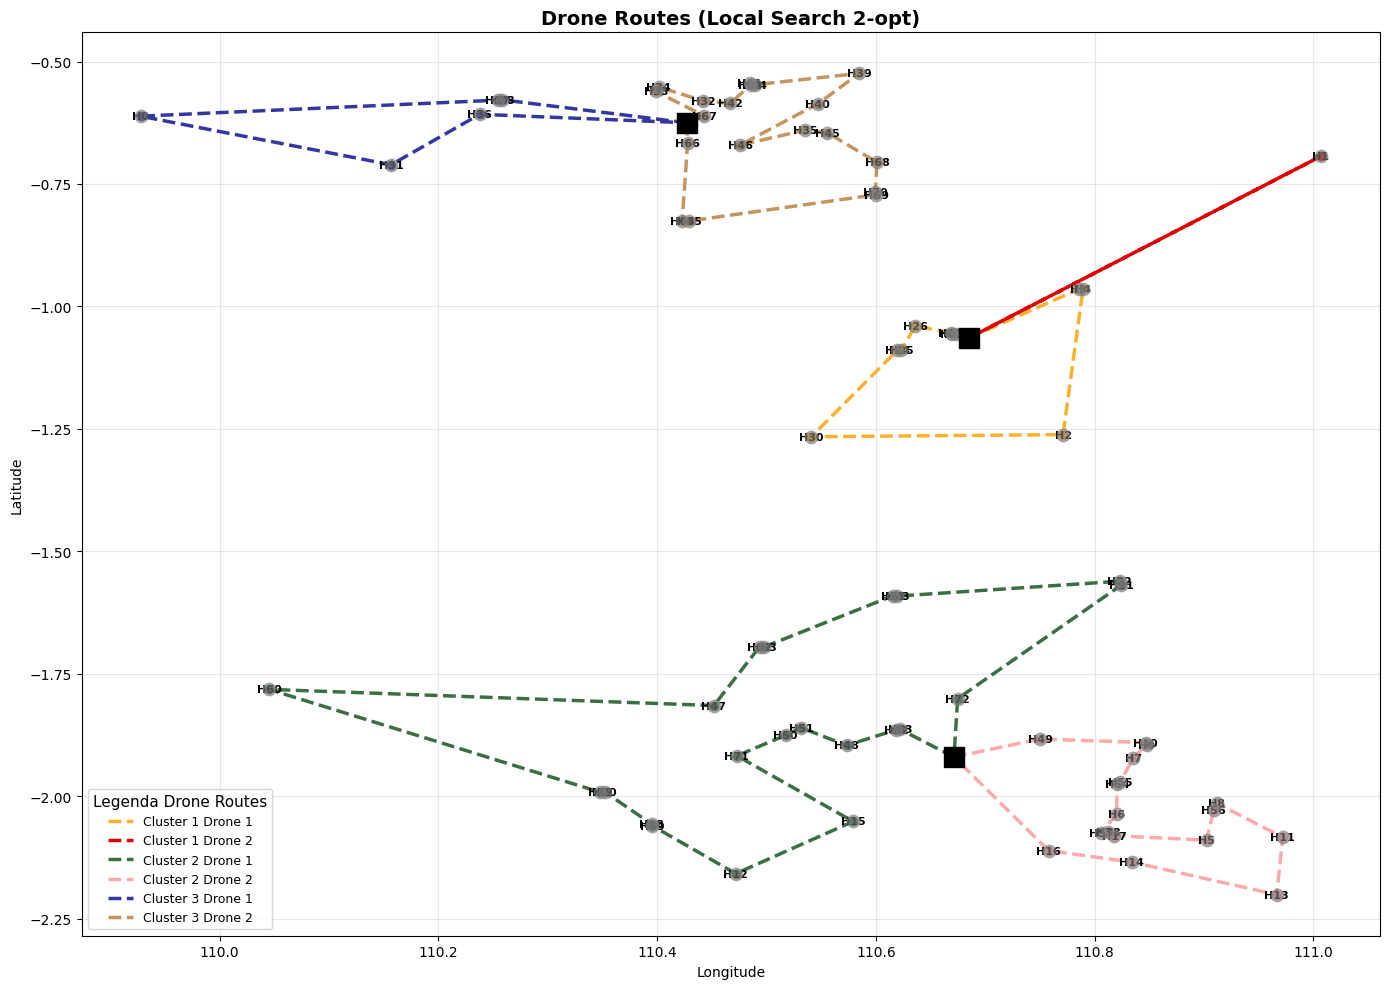

Total runtime: 0.03 seconds (0.00 minutes)


In [1]:
from ls import *
import time

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

# --- Start timing here ---
start_time = time.time()

routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

routes = routing.optimize_all_clusters()
routing.print_cluster_routes(routes)
routing.visualize_cluster_routes(routes)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

Cluster 0, Drone 1, Route: ([0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0], [2, 3, 4, 24, 25, 26, 27, 28, 29, 30])
Cluster 0, Drone 2, Route: ([0, 4, 0], [1])
Cluster 1, Drone 1, Route: ([1, 18, 15, 62, 21, 23, 22, 63, 74, 53, 51, 55, 56, 54, 50, 65, 66, 64, 26, 25, 24, 75, 1], [12, 15, 18, 19, 20, 21, 22, 23, 47, 48, 50, 51, 52, 53, 59, 60, 61, 62, 63, 71, 72])
Cluster 1, Drone 2, Route: ([1, 19, 17, 20, 61, 60, 9, 8, 16, 14, 59, 11, 57, 58, 10, 12, 13, 52, 1], [5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 49, 54, 55, 56, 57, 58])
Cluster 2, Drone 1, Route: ([2, 41, 40, 3, 34, 39, 2], [0, 31, 36, 37, 38])
Cluster 2, Drone 2, Route: ([2, 69, 67, 68, 72, 73, 71, 48, 38, 49, 43, 42, 47, 44, 46, 45, 35, 37, 36, 70, 2], [32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 45, 46, 64, 65, 66, 67, 68, 69, 70])

=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H30 -> H24 -> H25 -> H26 -> H29 -> H27 -> H28 -> R0
    

c:\Uni\softcomp\ls.py:223: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(


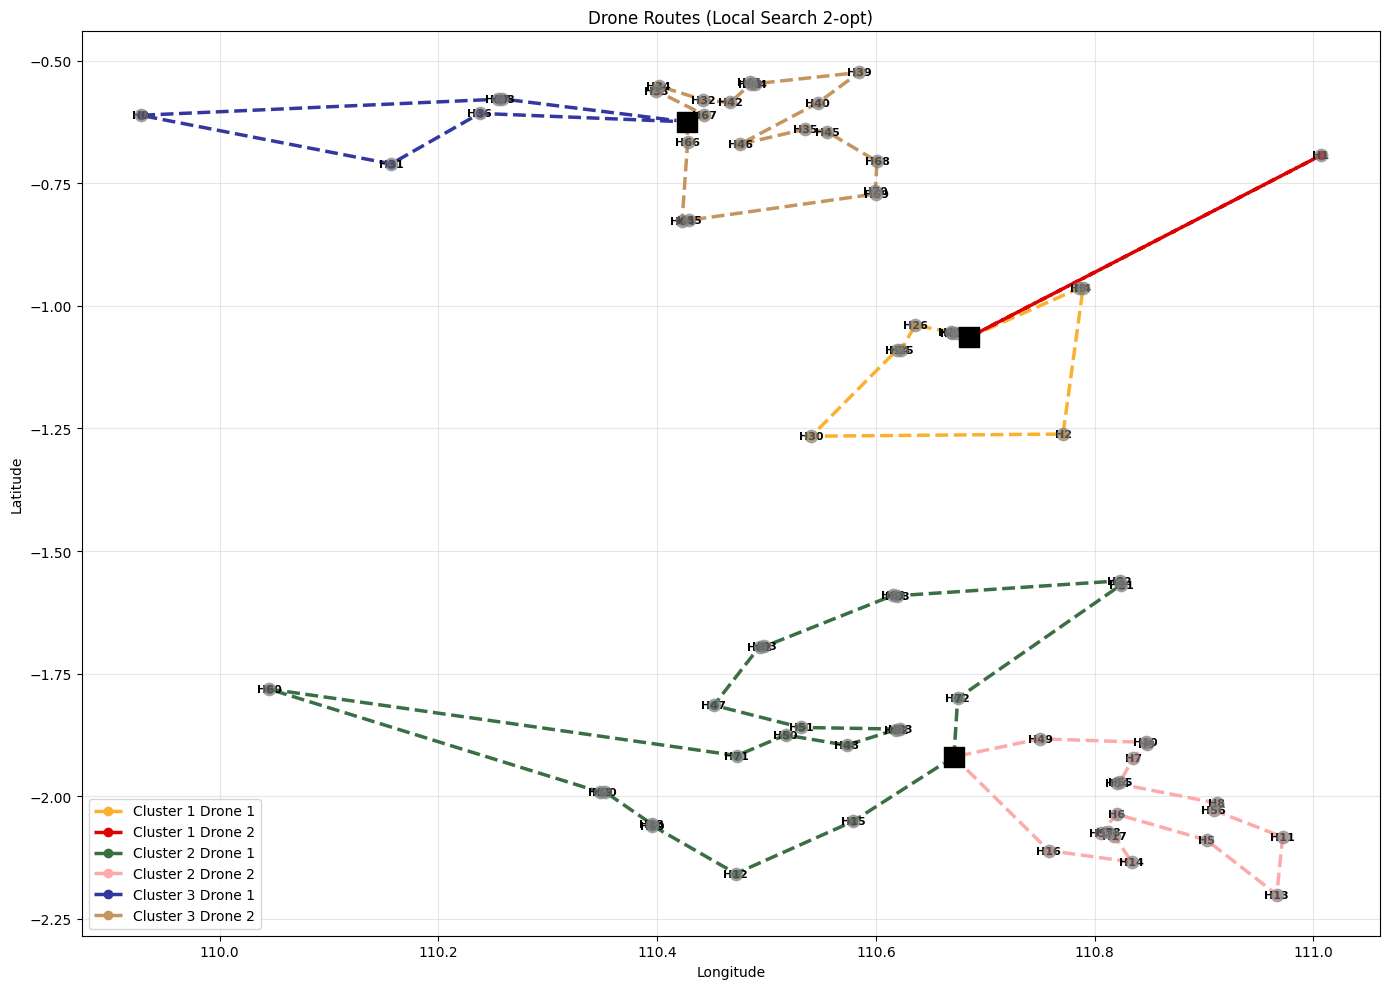

Total runtime: 0.03 seconds (0.00 minutes)


In [1]:
from ls import *
import time

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

# --- Start timing here ---
start_time = time.time()

routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

routes = routing.optimize_all_clusters()
routing.print_cluster_routes(routes)
routing.visualize_cluster_routes(routes)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

Cluster 0, Drone 1, Route: ([0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0], [2, 3, 4, 24, 25, 26, 27, 28, 29, 30])
Cluster 0, Drone 2, Route: ([0, 4, 0], [1])
Cluster 1, Drone 1, Route: ([1, 18, 15, 62, 21, 23, 22, 63, 74, 53, 54, 50, 65, 66, 64, 26, 25, 24, 75, 56, 55, 51, 1], [12, 15, 18, 19, 20, 21, 22, 23, 47, 48, 50, 51, 52, 53, 59, 60, 61, 62, 63, 71, 72])
Cluster 1, Drone 2, Route: ([1, 19, 60, 9, 61, 20, 17, 16, 14, 8, 59, 11, 57, 58, 10, 12, 13, 52, 1], [5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 49, 54, 55, 56, 57, 58])
Cluster 2, Drone 1, Route: ([2, 34, 3, 39, 40, 41, 2], [0, 31, 36, 37, 38])
Cluster 2, Drone 2, Route: ([2, 69, 49, 67, 68, 72, 73, 71, 48, 38, 43, 42, 47, 44, 46, 45, 35, 37, 36, 70, 2], [32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 45, 46, 64, 65, 66, 67, 68, 69, 70])

=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H30 -> H24 -> H25 -> H26 -> H29 -> H27 -> H28 -> R0
    

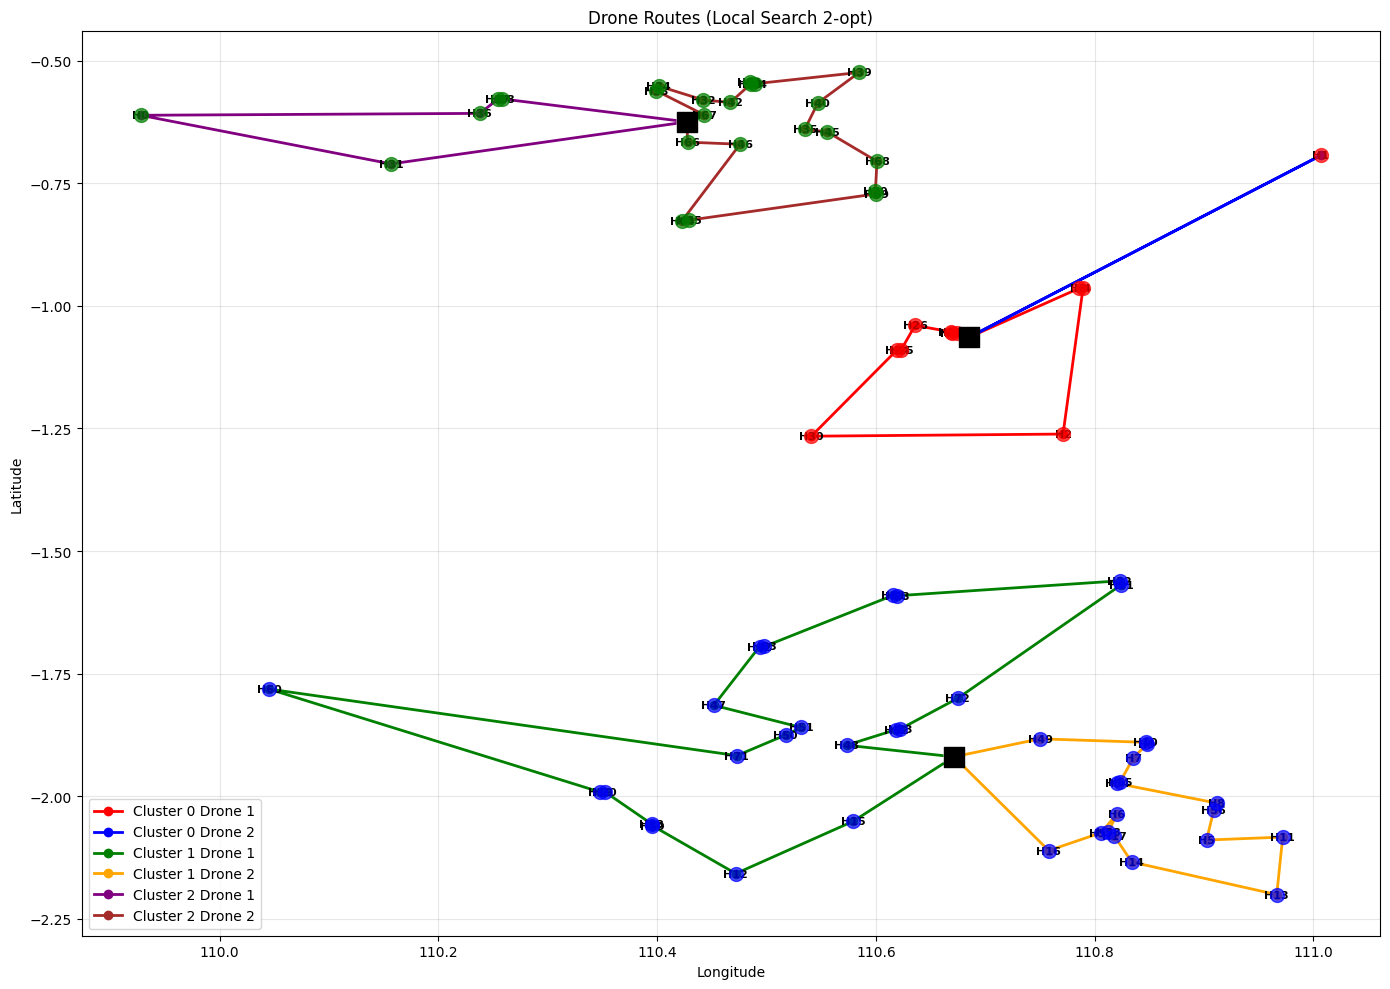

In [14]:
from ls import *

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

routes = routing.optimize_all_clusters()
routing.print_cluster_routes(routes)
routing.visualize_cluster_routes(routes)

Iterasi 2

Cluster 0, Drone 1, Route: [0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 56, 55, 51, 18, 15, 62, 21, 23, 22, 63, 50, 74, 53, 54, 65, 66, 64, 26, 25, 24, 75, 1]
Cluster 1, Drone 2, Route: [1, 19, 60, 61, 20, 17, 8, 16, 14, 59, 11, 9, 57, 58, 10, 12, 13, 52, 1]
Cluster 2, Drone 1, Route: [2, 34, 3, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 69, 67, 68, 72, 73, 71, 48, 38, 49, 43, 42, 47, 44, 46, 45, 35, 37, 36, 70, 2]

=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H30 -> H24 -> H25 -> H26 -> H29 -> H27 -> H28 -> R0
    Total distance: 108.70 km
    Est. flight time: 60.39 minutes
  Drone 2 Route: R0 -> H1 -> R0
    Total distance: 109.19 km
    Est. flight time: 60.66 minutes

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: R1 -> H53 -> H52 -> H48 -> H15 -> H12 -> H59 -> H18 -> H20

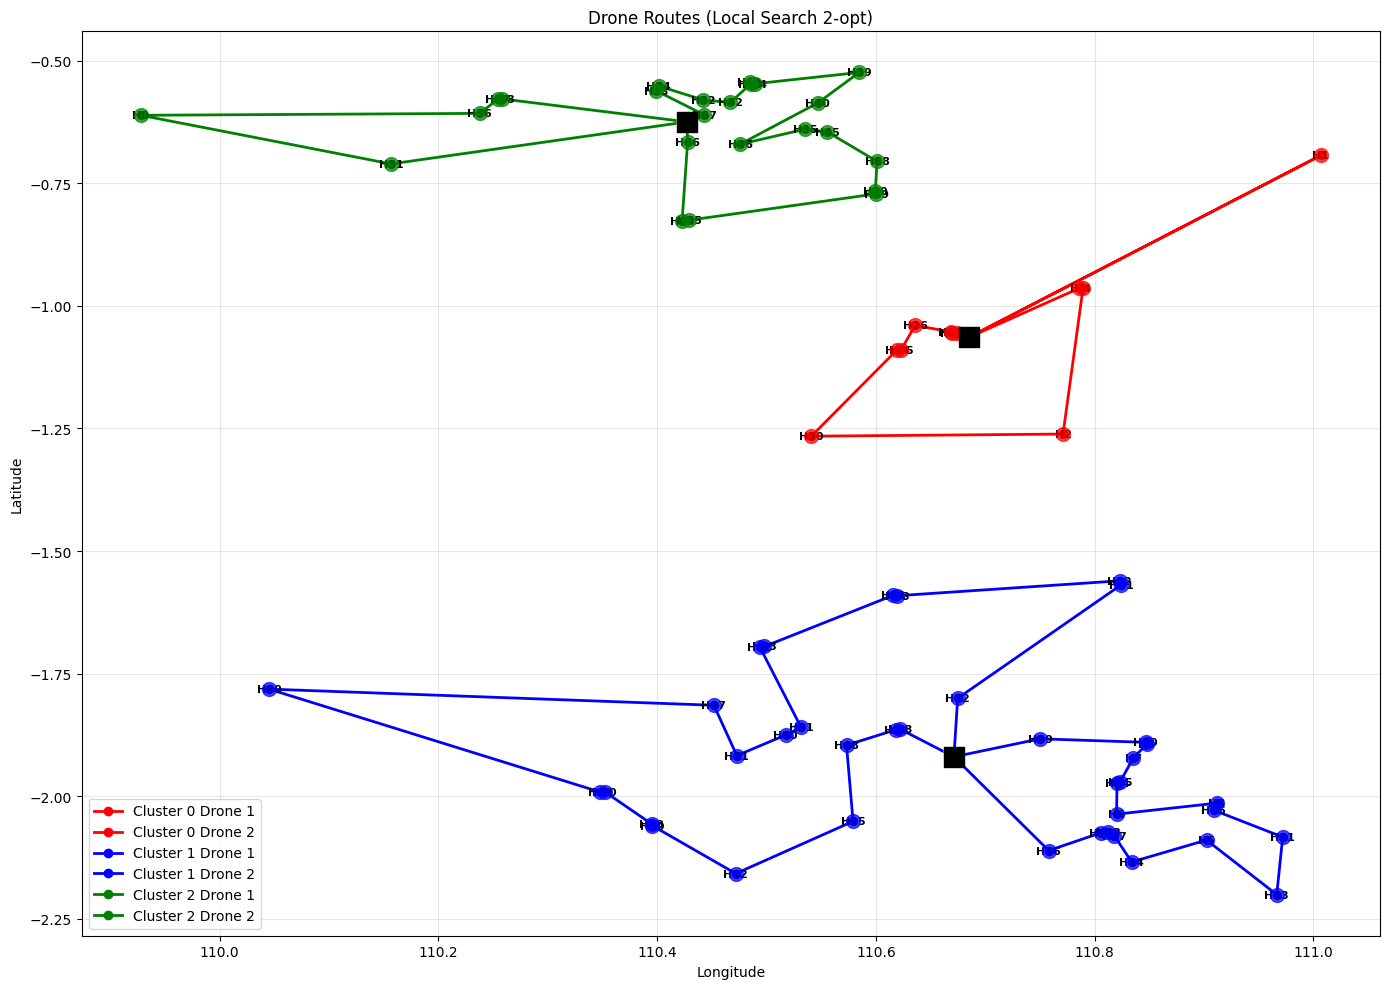

In [2]:
from ls import *

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

routes = routing.optimize_all_clusters()
routing.print_cluster_routes(routes)
routing.visualize_cluster_routes(routes)

Hyperparameter Tuning

In [1]:
import optuna
from ls import *
import time

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

def objective(trial):
    #Define hyperparameters for Bayesian optimization
    max_iterations = trial.suggest_int("max_iterations", 100, 2000)
    step_size = trial.suggest_float("step_size", 0.01, 1.0, log=True)
    n_restarts = trial.suggest_int("n_restarts", 1, 5)
    neighbor_swap_rate = trial.suggest_float("neighbor_swap_rate", 0.1, 0.5)

    #Initialize the routing class
    routing = ClusterBasedDroneRouting_LocalSearch(
        csv_file="ketapang-12-08-24_merged_clustered_3.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2}
    )

    #Optimize using the trial hyperparameters
    routes = routing.optimize_all_clusters_bayesian(
        max_iterations=max_iterations,
        step_size=step_size,
        n_restarts=n_restarts,
        neighbor_swap_rate=neighbor_swap_rate
    )

    #Compute total distance
    total_distance = 0
    for cluster_id, route_list in routes.items():
        for route_info in route_list:
            # route_info can be either (route, group) or just route
            if isinstance(route_info, tuple):
                route, group = route_info
            else:
                route = route_info
                group = None

            if len(route) < 2:
                continue

            # Get the cluster’s global hotspot indices
            cluster_hotspots = [
                i + len(routing.road_points)
                for i, c in enumerate(routing.clusters)
                if c == cluster_id
            ]

            # Convert local route indices → global indices
            route_global = []
            for loc in route:
                if loc < len(routing.road_points):  # it's a road/depot point
                    route_global.append(loc)
                elif group and loc in group:
                    # Use group indices (already global)
                    route_global.append(loc)
                elif loc - len(routing.road_points) < len(cluster_hotspots):
                    route_global.append(cluster_hotspots[loc - len(routing.road_points)])
                else:
                    route_global.append(loc)  # fallback if already global

            # Sum the total distance
            for i in range(len(route_global) - 1):
                total_distance += routing.dist_matrix[route_global[i]][route_global[i + 1]]

    return total_distance
    

# --- Start timing here ---
start_time = time.time()

# Run the optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200, show_progress_bar=True, n_jobs=-1)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

# Print best result
print("Best hyperparameters:", study.best_params)
print("Best total distance:", study.best_value)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

[I 2025-10-20 17:29:20,656] A new study created in memory with name: no-name-40c58906-69ed-475f-8f5b-7ed5aa5fac26


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2025-10-20 17:29:23,473] Trial 2 finished with value: 1099.1858775208514 and parameters: {'max_iterations': 1015, 'step_size': 0.024658891709335284, 'n_restarts': 1, 'neighbor_swap_rate': 0.1501293201645022}. Best is trial 2 with value: 1099.1858775208514.
[I 2025-10-20 17:29:23,619] Trial 11 finished with value: 1113.6381232675571 and parameters: {'max_iterations': 1421, 'step_size': 0.011667535647148104, 'n_restarts': 1, 'neighbor_swap_rate': 0.4901492579482425}. Best is trial 2 with value: 1099.1858775208514.
[I 2025-10-20 17:29:23,624] Trial 5 finished with value: 1121.52532744761 and parameters: {'max_iterations': 1357, 'step_size': 0.3349087839095389, 'n_restarts': 1, 'neighbor_swap_rate': 0.35917520965494343}. Best is trial 2 with value: 1099.1858775208514.
[I 2025-10-20 17:29:24,272] Trial 6 finished with value: 1085.4080711418278 and parameters: {'max_iterations': 1917, 'step_size': 0.03384773027975781, 'n_restarts': 1, 'neighbor_swap_rate': 0.17450822307602548}. Best is tr


=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H30 -> H24 -> H25 -> H26 -> H29 -> H27 -> H28 -> R0
    Total distance: 108.70 km
    Est. flight time: 60.39 minutes
  Drone 2 Route: R0 -> H1 -> R0
    Total distance: 109.19 km
    Est. flight time: 60.66 minutes

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: R1 -> H72 -> H21 -> H22 -> H23 -> H61 -> H63 -> H62 -> H60 -> H19 -> H20 -> H18 -> H59 -> H12 -> H15 -> H71 -> H47 -> H50 -> H51 -> H48 -> H52 -> H53 -> R1
    Total distance: 281.89 km
    Est. flight time: 156.61 minutes
  Drone 2 Route: R1 -> H49 -> H10 -> H9 -> H7 -> H55 -> H54 -> H6 -> H57 -> H58 -> H17 -> H5 -> H56 -> H8 -> H11 -> H13 -> H14 -> H16 -> R1
    Total distance: 133.24 km
    Est. flight time: 74.02 minutes

Cluster 2 (Drones: 2):
  Start from road point: (-0.62504, 110.42735)
  Drone 1 Route: R2 -> H31 -> H0 -> H36 -> H37 

c:\Uni\softcomp\ls.py:223: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(


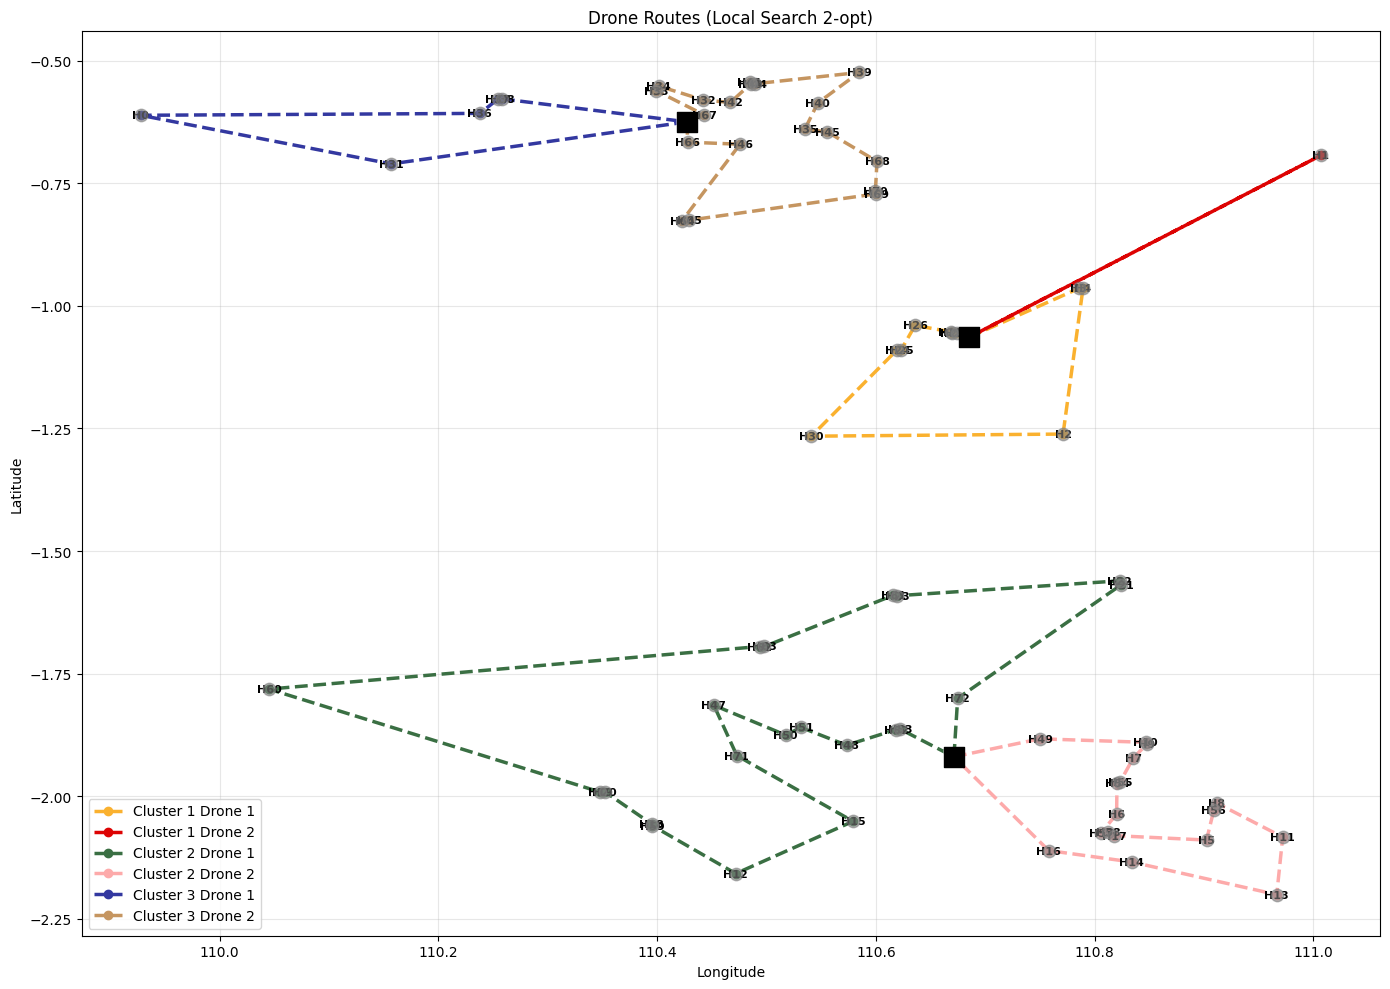

Total runtime: 0.16 seconds (0.00 minutes)


In [2]:
from ls import *
import time

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

#Initialize the routing class
routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

# --- Start timing here ---
start_time = time.time()

routes_opt = routing.optimize_all_clusters_bayesian(
        max_iterations=1680,
        step_size=0.9681856058607484,
        n_restarts=1,
        neighbor_swap_rate=0.21829145027219568
    )

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

routing.print_cluster_routes(routes_opt)
routing.visualize_cluster_routes(routes_opt)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

In [ ]:
import optuna
from ls import *
import time

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

def objective(trial):
    #Define hyperparameters for Bayesian optimization
    max_iterations = trial.suggest_int("max_iterations", 100, 2000)
    step_size = trial.suggest_float("step_size", 0.01, 1.0, log=True)
    n_restarts = trial.suggest_int("n_restarts", 1, 5)
    neighbor_swap_rate = trial.suggest_float("neighbor_swap_rate", 0.1, 0.5)

    #Initialize the routing class
    routing = ClusterBasedDroneRouting_LocalSearch(
        csv_file="ketapang-12-08-24_merged_clustered_3.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2}
    )

    #Optimize using the trial hyperparameters
    routes = routing.optimize_all_clusters_bayesian(
        max_iterations=max_iterations,
        step_size=step_size,
        n_restarts=n_restarts,
        neighbor_swap_rate=neighbor_swap_rate
    )

    #Compute total distance
    total_distance = 0
    for cluster_id, route_list in routes.items():
        for route in route_list:
            if len(route) < 2:
                continue
            for i in range(len(route) - 1):
                total_distance += routing.dist_matrix[route[i]][route[i + 1]]

    return total_distance 
    

# --- Start timing here ---
start_time = time.time()

# Run the optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200, show_progress_bar=True, n_jobs=-1)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

# Print best result
print("Best hyperparameters:", study.best_params)
print("Best total distance:", study.best_value)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

Cluster 0, Drone 1, Route: [0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 56, 55, 51, 18, 15, 62, 21, 23, 22, 63, 50, 74, 53, 54, 65, 66, 64, 26, 25, 24, 75, 1]
Cluster 1, Drone 2, Route: [1, 9, 20, 61, 60, 19, 17, 16, 14, 8, 59, 11, 57, 58, 10, 12, 13, 52, 1]
Cluster 2, Drone 1, Route: [2, 34, 3, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 69, 49, 67, 68, 72, 73, 71, 48, 38, 43, 42, 47, 44, 46, 45, 35, 37, 36, 70, 2]

=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H30 -> H24 -> H25 -> H26 -> H29 -> H27 -> H28 -> R0
    Total distance: 108.70 km
    Est. flight time: 60.39 minutes
  Drone 2 Route: R0 -> H1 -> R0
    Total distance: 109.19 km
    Est. flight time: 60.66 minutes

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: R1 -> H53 -> H52 -> H48 -> H15 -> H12 -> H59 -> H18 -> H20

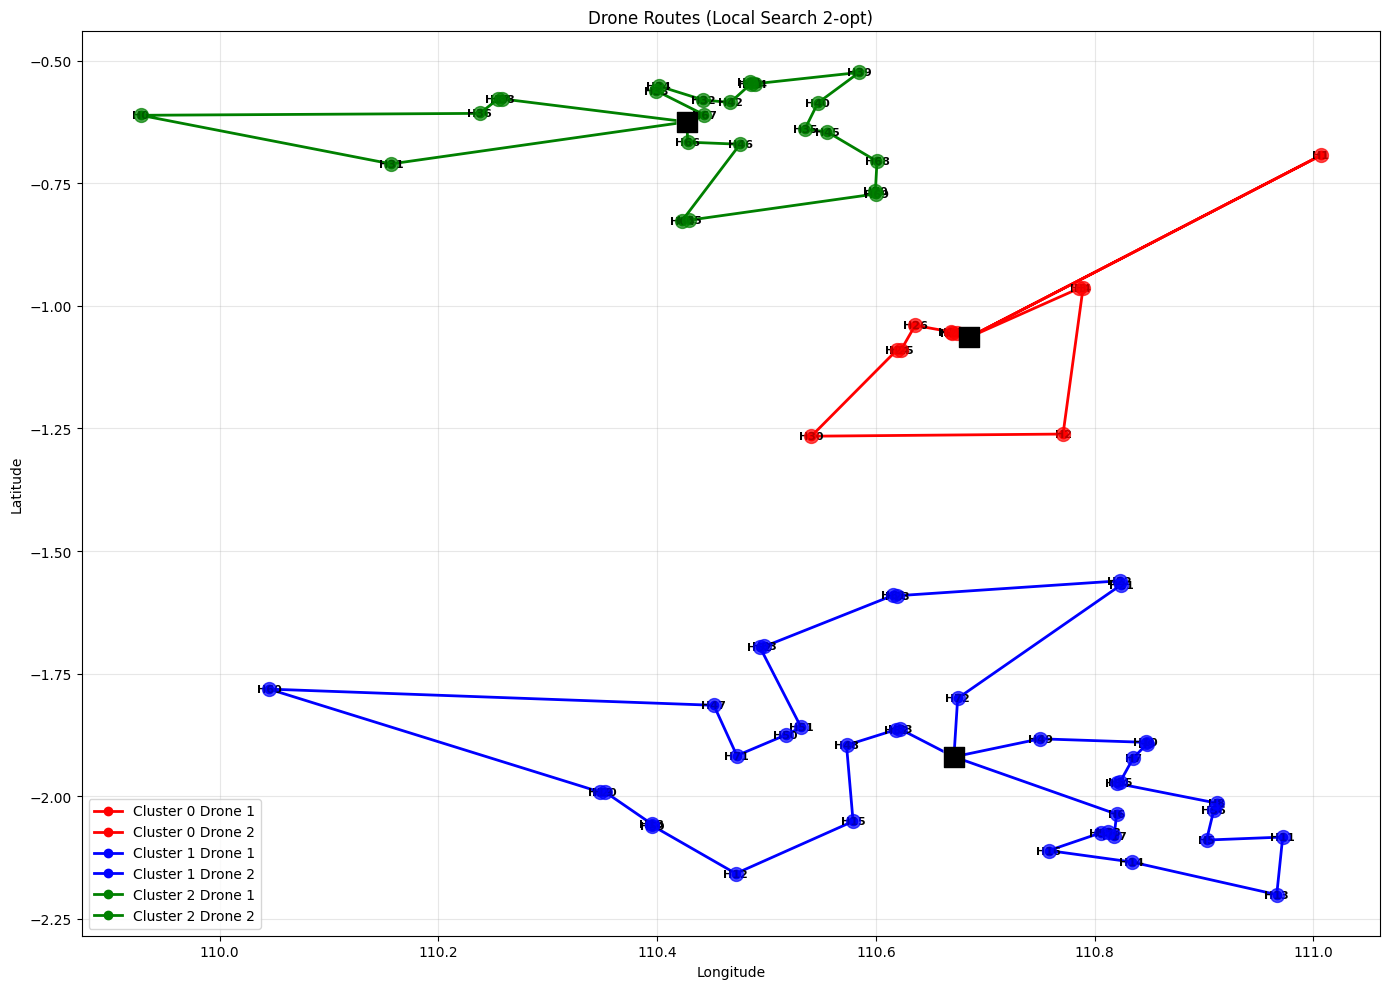

In [ ]:
from ls import *
import time

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

#Initialize the routing class
routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

# --- Start timing here ---
start_time = time.time()

routes_opt = routing.optimize_all_clusters_bayesian(
        max_iterations=1680,
        step_size=0.9681856058607484,
        n_restarts=1,
        neighbor_swap_rate=0.21829145027219568
    )

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

routing.print_cluster_routes(routes_opt)
routing.visualize_cluster_routes(routes_opt)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

New Mapping

In [1]:
from ls import *

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

routes = routing.optimize_all_clusters()
routing.print_cluster_routes(routes)
routing.new_visualize_cluster_routes(routes)

Cluster 0, Drone 1, Route: ([0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0], [2, 3, 4, 24, 25, 26, 27, 28, 29, 30])
Cluster 0, Drone 2, Route: ([0, 4, 0], [1])
Cluster 1, Drone 1, Route: ([1, 18, 15, 62, 21, 23, 22, 63, 74, 51, 55, 56, 54, 53, 50, 65, 66, 64, 26, 25, 24, 75, 1], [12, 15, 18, 19, 20, 21, 22, 23, 47, 48, 50, 51, 52, 53, 59, 60, 61, 62, 63, 71, 72])
Cluster 1, Drone 2, Route: ([1, 52, 13, 12, 10, 58, 57, 9, 11, 59, 8, 14, 16, 17, 20, 61, 60, 19, 1], [5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 49, 54, 55, 56, 57, 58])
Cluster 2, Drone 1, Route: ([2, 41, 40, 3, 34, 39, 2], [0, 31, 36, 37, 38])
Cluster 2, Drone 2, Route: ([2, 70, 36, 37, 35, 45, 46, 44, 47, 42, 43, 38, 48, 71, 73, 72, 68, 67, 49, 69, 2], [32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 45, 46, 64, 65, 66, 67, 68, 69, 70])

=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H30 -> H24 -> H25 -> H26 -> H29 -> H27 -> H28 -> R0
    

In [1]:
from ls import *

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

#Initialize the routing class
routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

routes_opt = routing.optimize_all_clusters_bayesian(
        max_iterations=877,
        step_size=0.01950746499195542,
        n_restarts=1,
        neighbor_swap_rate=0.20075979014470136
    )

routing.print_cluster_routes(routes_opt)
routing.new_visualize_cluster_routes(routes_opt)


=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H30 -> H24 -> H25 -> H26 -> H29 -> H27 -> H28 -> R0
    Total distance: 108.70 km
    Est. flight time: 60.39 minutes
  Drone 2 Route: R0 -> H1 -> R0
    Total distance: 109.19 km
    Est. flight time: 60.66 minutes

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: R1 -> H72 -> H21 -> H22 -> H23 -> H61 -> H53 -> H52 -> H48 -> H51 -> H50 -> H71 -> H47 -> H63 -> H62 -> H60 -> H19 -> H20 -> H18 -> H59 -> H12 -> H15 -> R1
    Total distance: 296.41 km
    Est. flight time: 164.67 minutes
  Drone 2 Route: R1 -> H16 -> H57 -> H6 -> H58 -> H17 -> H14 -> H13 -> H11 -> H5 -> H56 -> H8 -> H54 -> H55 -> H7 -> H9 -> H10 -> H49 -> R1
    Total distance: 133.05 km
    Est. flight time: 73.92 minutes

Cluster 2 (Drones: 2):
  Start from road point: (-0.62504, 110.42735)
  Drone 1 Route: R2 -> H31 -> H0 -> H36 -> H37 

Melawi

Cluster 0, Drone 1, Route: ([0, 55, 13, 14, 54, 10, 52, 0], [6, 9, 10, 48, 50, 51])
Cluster 0, Drone 2, Route: ([0, 15, 11, 56, 12, 38, 0], [7, 8, 11, 34, 52])
Cluster 1, Drone 1, Route: ([1, 80, 79, 78, 77, 28, 75, 74, 27, 26, 72, 73, 76, 44, 45, 43, 1], [22, 23, 24, 39, 40, 41, 68, 69, 70, 71, 72, 73, 74, 75, 76])
Cluster 1, Drone 2, Route: ([1, 71, 25, 24, 23, 70, 68, 40, 66, 67, 64, 65, 21, 22, 42, 69, 1], [17, 18, 19, 20, 21, 36, 38, 60, 61, 62, 63, 64, 65, 66, 67])
Cluster 2, Drone 1, Route: ([2, 5, 4, 8, 7, 6, 2], [0, 1, 2, 3, 4])
Cluster 2, Drone 2, Route: ([2, 19, 59, 20, 60, 58, 2], [15, 16, 54, 55, 56])
Cluster 3, Drone 1, Route: ([3, 57, 49, 48, 9, 36, 37, 31, 32, 50, 51, 33, 34, 35, 53, 47, 46, 30, 29, 3], [5, 25, 26, 27, 28, 29, 30, 31, 32, 33, 42, 43, 44, 45, 46, 47, 49, 53])
Cluster 3, Drone 2, Route: ([3, 18, 39, 17, 16, 41, 63, 61, 62, 3], [12, 13, 14, 35, 37, 57, 58, 59])

=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-0.40901,

c:\Uni\softcomp\ls.py:227: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(


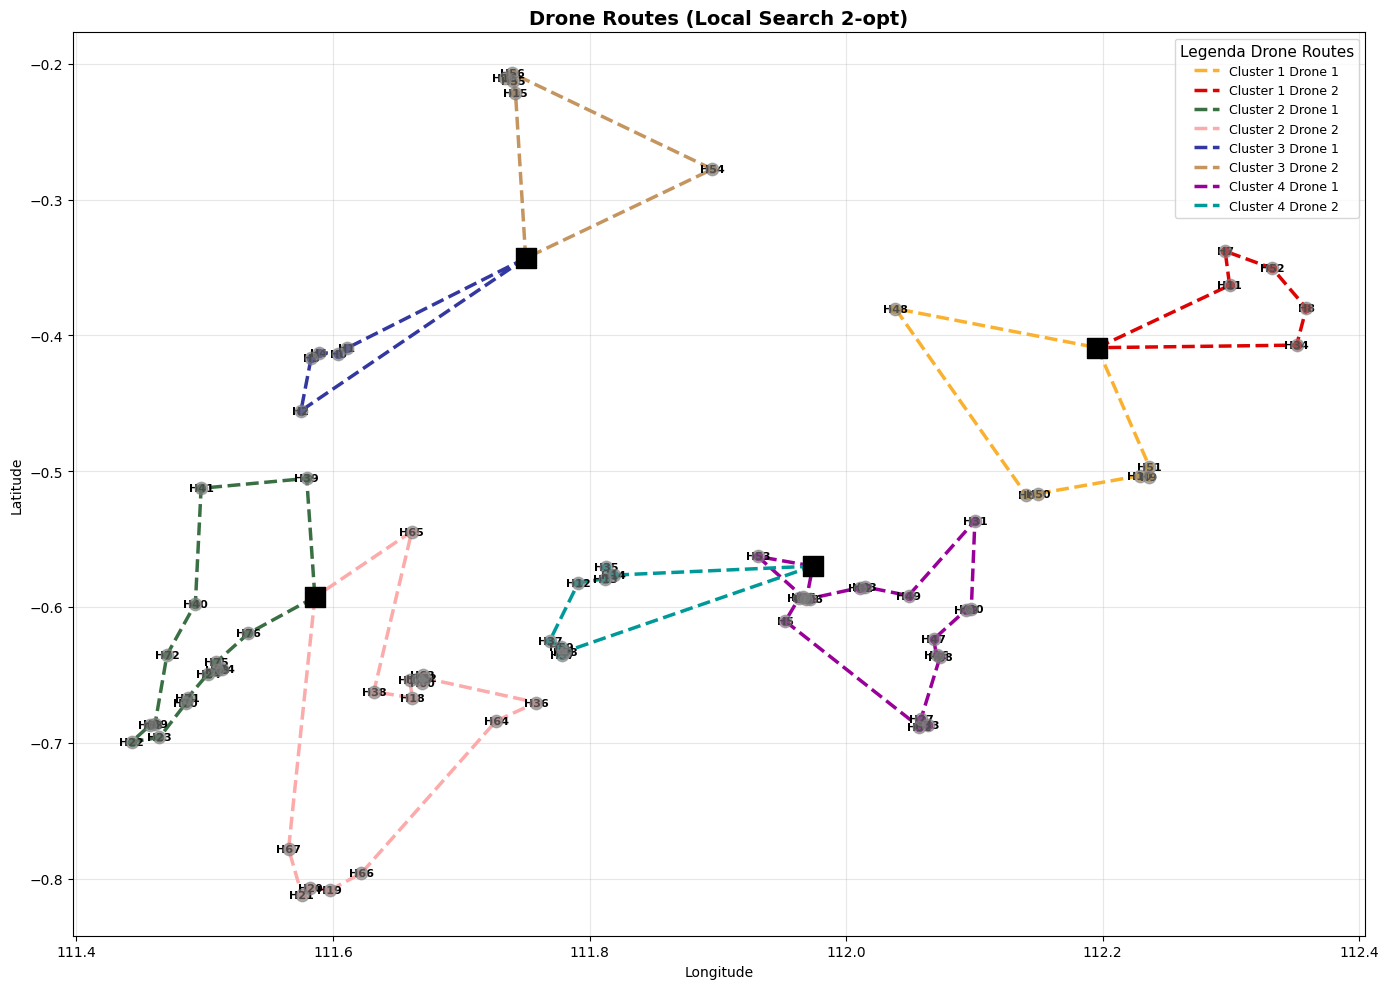

✅ Variabel peta terdeteksi: map_a6dd33d71f96131d7cc91617eedbb730
✅ Rute drone (Local Search Only) berhasil ditambahkan ke peta: new_forest_fire_clusters_with_local_search_routes_melawi.html
Total runtime: 0.04 seconds (0.00 minutes)


In [2]:
from ls import *
import time
road_points = {
    0: (-0.409011175, 112.1958254),   # Cluster 1
    1: (-0.592699463, 111.5859392),   # Cluster 2
    2: (-0.343085986, 111.7502586),   # Cluster 3 (Depo Utama BPBD)
    3: (-0.569912205, 111.9740824)    # Cluster 4
}

n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

# --- Start timing here ---
start_time = time.time()

routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="hotspot_clustered_2.csv",
    road_points=road_points,
    n_drones=n_drones
)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

routes = routing.optimize_all_clusters()
routing.print_cluster_routes(routes)
routing.visualize_cluster_routes(routes)
routing.melawi_visualize_cluster_routes(routes)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

Iterasi 1

Cluster 0, Drone 1, Route: ([0, 52, 10, 54, 14, 13, 55, 0], [6, 9, 10, 48, 50, 51])
Cluster 0, Drone 2, Route: ([0, 15, 11, 56, 12, 38, 0], [7, 8, 11, 34, 52])
Cluster 1, Drone 1, Route: ([1, 80, 79, 78, 77, 28, 75, 74, 27, 26, 72, 73, 76, 44, 45, 43, 1], [22, 23, 24, 39, 40, 41, 68, 69, 70, 71, 72, 73, 74, 75, 76])
Cluster 1, Drone 2, Route: ([1, 71, 25, 24, 23, 70, 68, 40, 66, 67, 64, 65, 21, 22, 42, 69, 1], [17, 18, 19, 20, 21, 36, 38, 60, 61, 62, 63, 64, 65, 66, 67])
Cluster 2, Drone 1, Route: ([2, 5, 4, 8, 7, 6, 2], [0, 1, 2, 3, 4])
Cluster 2, Drone 2, Route: ([2, 58, 59, 60, 20, 19, 2], [15, 16, 54, 55, 56])
Cluster 3, Drone 1, Route: ([3, 46, 47, 53, 35, 34, 33, 51, 50, 32, 31, 37, 36, 30, 29, 49, 48, 9, 57, 3], [5, 25, 26, 27, 28, 29, 30, 31, 32, 33, 42, 43, 44, 45, 46, 47, 49, 53])
Cluster 3, Drone 2, Route: ([3, 62, 61, 63, 41, 16, 17, 39, 18, 3], [12, 13, 14, 35, 37, 57, 58, 59])

=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-0.40901,

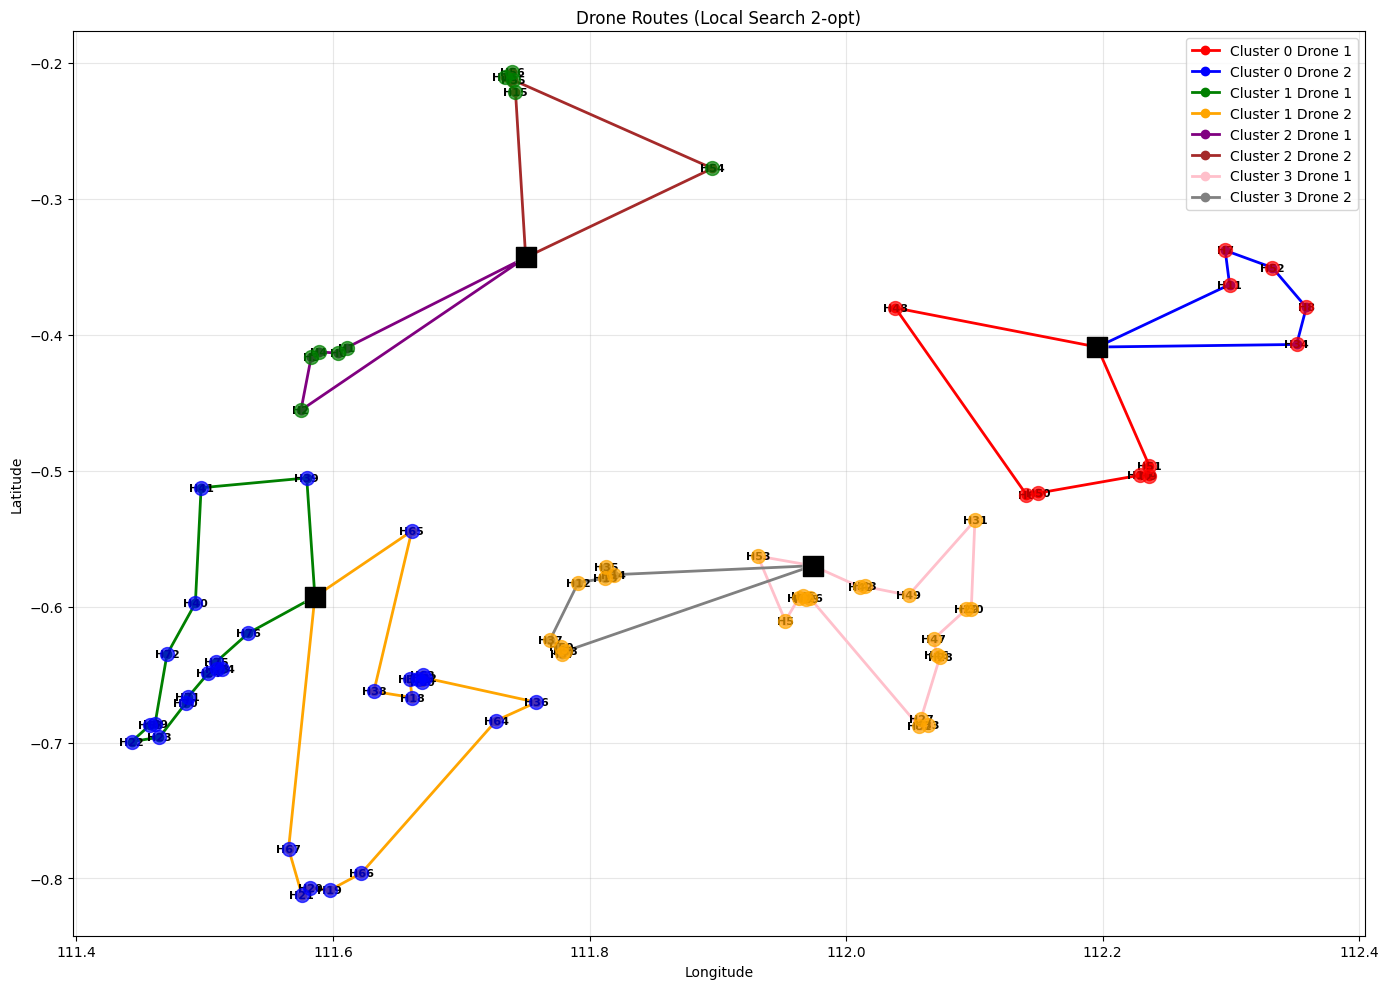

In [3]:
from ls import *

road_points = {
    0: (-0.409011175, 112.1958254),   # Cluster 1
    1: (-0.592699463, 111.5859392),   # Cluster 2
    2: (-0.343085986, 111.7502586),   # Cluster 3 (Depo Utama BPBD)
    3: (-0.569912205, 111.9740824)    # Cluster 4
}

n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="hotspot_clustered_2.csv",
    road_points=road_points,
    n_drones=n_drones
)

routes = routing.optimize_all_clusters()
routing.print_cluster_routes(routes)
routing.visualize_cluster_routes(routes)
# routing.melawi_visualize_cluster_routes(routes)

Iterasi 2

Cluster 0, Drone 1, Route: ([0, 55, 13, 14, 54, 10, 52, 0], [6, 9, 10, 48, 50, 51])
Cluster 0, Drone 2, Route: ([0, 15, 11, 56, 12, 38, 0], [7, 8, 11, 34, 52])
Cluster 1, Drone 1, Route: ([1, 80, 79, 78, 77, 28, 75, 74, 27, 26, 72, 73, 76, 44, 45, 43, 1], [22, 23, 24, 39, 40, 41, 68, 69, 70, 71, 72, 73, 74, 75, 76])
Cluster 1, Drone 2, Route: ([1, 21, 65, 67, 66, 64, 22, 42, 71, 25, 24, 23, 70, 68, 40, 69, 1], [17, 18, 19, 20, 21, 36, 38, 60, 61, 62, 63, 64, 65, 66, 67])
Cluster 2, Drone 1, Route: ([2, 5, 4, 8, 7, 6, 2], [0, 1, 2, 3, 4])
Cluster 2, Drone 2, Route: ([2, 20, 60, 59, 19, 58, 2], [15, 16, 54, 55, 56])
Cluster 3, Drone 1, Route: ([3, 46, 47, 53, 35, 34, 33, 51, 50, 32, 37, 36, 31, 9, 48, 29, 30, 49, 57, 3], [5, 25, 26, 27, 28, 29, 30, 31, 32, 33, 42, 43, 44, 45, 46, 47, 49, 53])
Cluster 3, Drone 2, Route: ([3, 62, 61, 63, 41, 16, 17, 39, 18, 3], [12, 13, 14, 35, 37, 57, 58, 59])

=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-0.40901,

TypeError: '<' not supported between instances of 'list' and 'int'

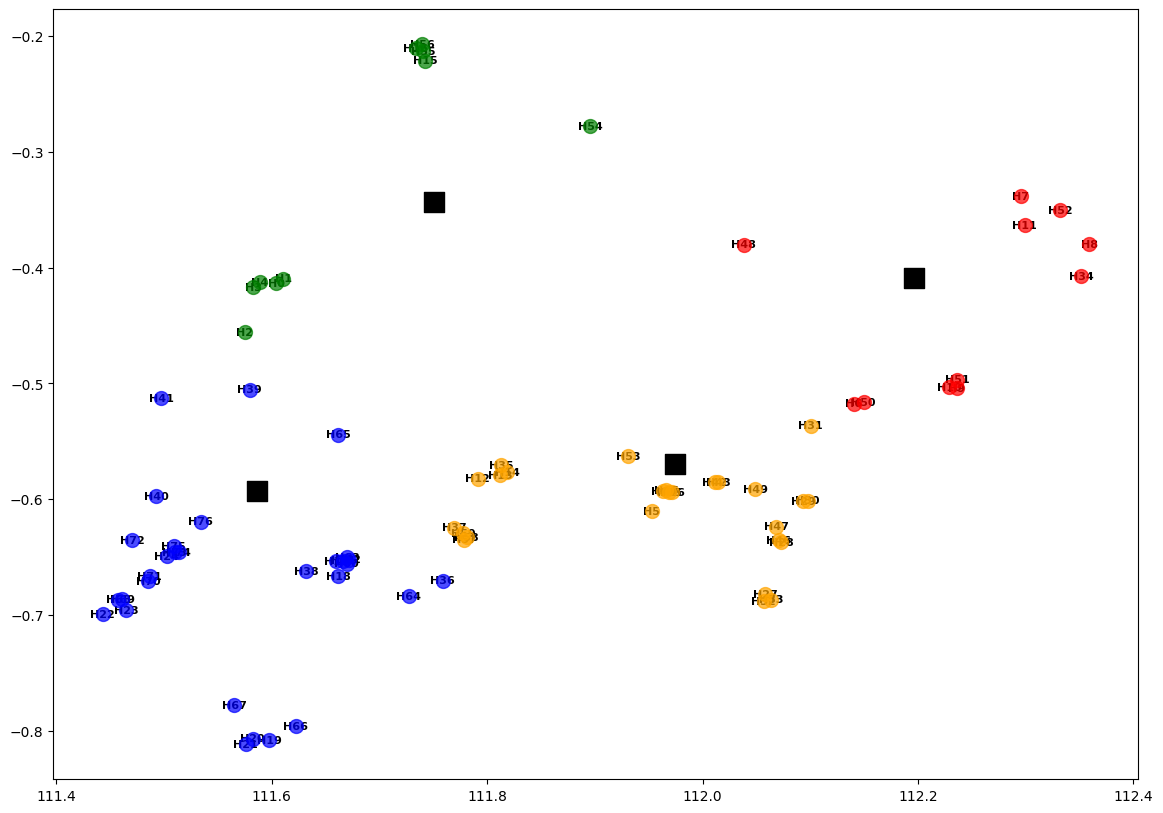

In [4]:
from ls import *

road_points = {
    0: (-0.409011175, 112.1958254),   # Cluster 1
    1: (-0.592699463, 111.5859392),   # Cluster 2
    2: (-0.343085986, 111.7502586),   # Cluster 3 (Depo Utama BPBD)
    3: (-0.569912205, 111.9740824)    # Cluster 4
}

n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="hotspot_clustered_2.csv",
    road_points=road_points,
    n_drones=n_drones
)

routes = routing.optimize_all_clusters()
routing.print_cluster_routes(routes)
routing.visualize_cluster_routes(routes)
# routing.melawi_visualize_cluster_routes(routes)

Iterasi 3

Cluster 0, Drone 1, Route: ([0, 52, 10, 54, 14, 13, 55, 0], [6, 9, 10, 48, 50, 51])
Cluster 0, Drone 2, Route: ([0, 38, 12, 56, 11, 15, 0], [7, 8, 11, 34, 52])
Cluster 1, Drone 1, Route: ([1, 80, 79, 78, 77, 28, 75, 74, 27, 26, 72, 73, 76, 44, 45, 43, 1], [22, 23, 24, 39, 40, 41, 68, 69, 70, 71, 72, 73, 74, 75, 76])
Cluster 1, Drone 2, Route: ([1, 42, 71, 25, 24, 23, 70, 68, 40, 22, 21, 65, 64, 66, 67, 69, 1], [17, 18, 19, 20, 21, 36, 38, 60, 61, 62, 63, 64, 65, 66, 67])
Cluster 2, Drone 1, Route: ([2, 5, 4, 8, 7, 6, 2], [0, 1, 2, 3, 4])
Cluster 2, Drone 2, Route: ([2, 19, 59, 20, 60, 58, 2], [15, 16, 54, 55, 56])
Cluster 3, Drone 1, Route: ([3, 46, 47, 53, 35, 34, 33, 51, 50, 32, 37, 36, 31, 9, 30, 29, 49, 48, 57, 3], [5, 25, 26, 27, 28, 29, 30, 31, 32, 33, 42, 43, 44, 45, 46, 47, 49, 53])
Cluster 3, Drone 2, Route: ([3, 18, 39, 17, 16, 41, 63, 61, 62, 3], [12, 13, 14, 35, 37, 57, 58, 59])

=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-0.40901,

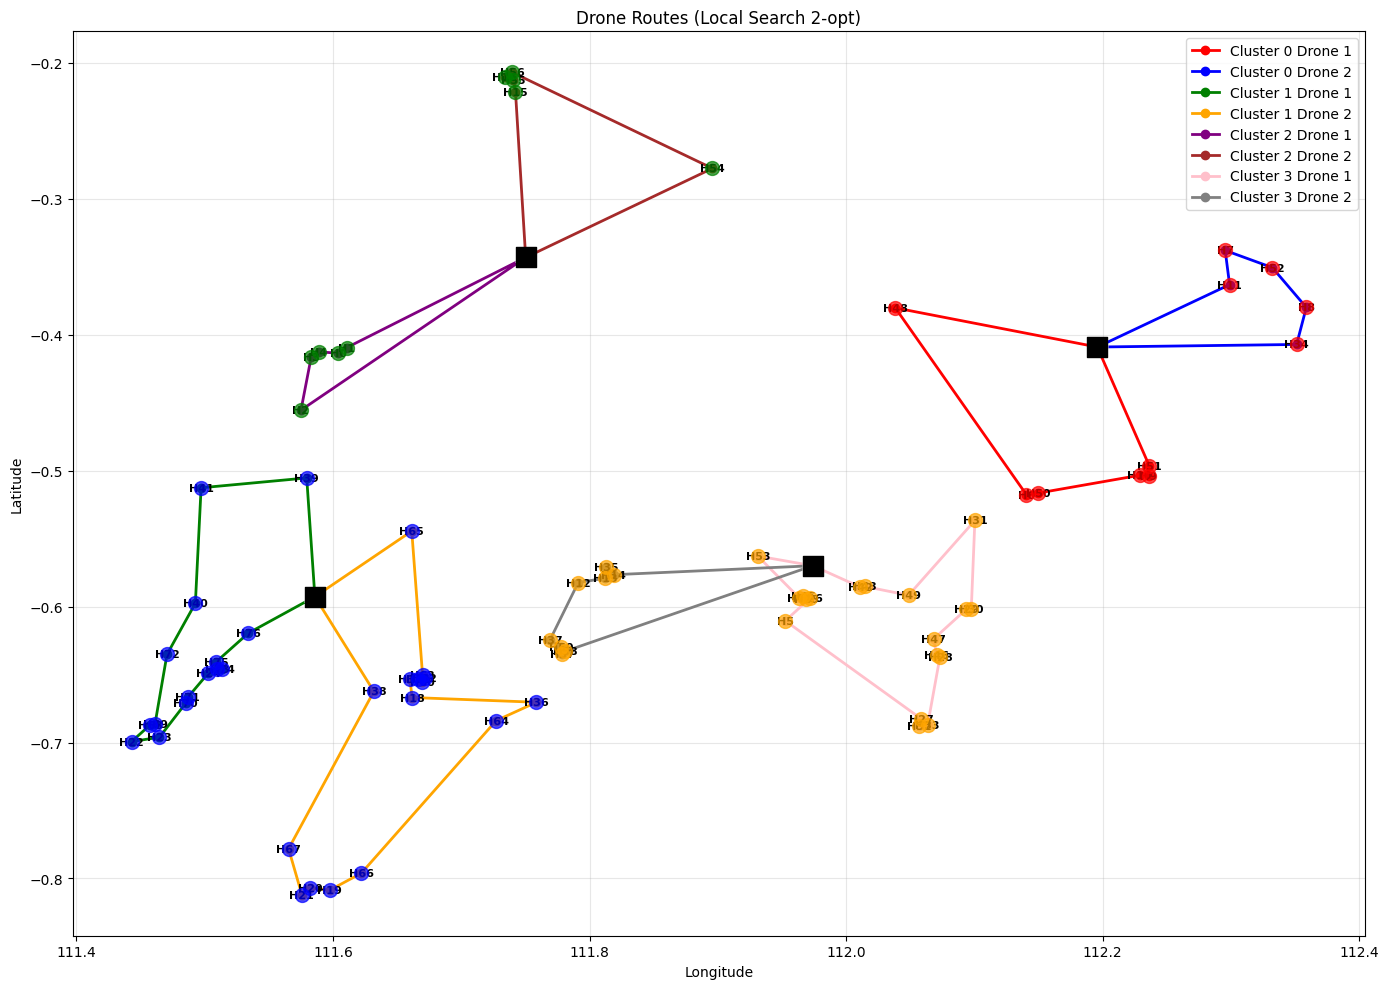

In [1]:
from ls import *

road_points = {
    0: (-0.409011175, 112.1958254),   # Cluster 1
    1: (-0.592699463, 111.5859392),   # Cluster 2
    2: (-0.343085986, 111.7502586),   # Cluster 3 (Depo Utama BPBD)
    3: (-0.569912205, 111.9740824)    # Cluster 4
}

n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="hotspot_clustered_2.csv",
    road_points=road_points,
    n_drones=n_drones
)

routes = routing.optimize_all_clusters()
routing.print_cluster_routes(routes)
routing.visualize_cluster_routes(routes)
# routing.melawi_visualize_cluster_routes(routes)

Hyperparameter Tuning

In [9]:
from ls import *
import optuna

road_points = {
    0: (-0.409011175, 112.1958254),   # Cluster 1
    1: (-0.592699463, 111.5859392),   # Cluster 2
    2: (-0.343085986, 111.7502586),   # Cluster 3 (Depo Utama BPBD)
    3: (-0.569912205, 111.9740824)    # Cluster 4
}

def objective(trial):
    #Define hyperparameters for Bayesian optimization
    max_iterations = trial.suggest_int("max_iterations", 100, 2000)
    step_size = trial.suggest_float("step_size", 0.01, 1.0, log=True)
    n_restarts = trial.suggest_int("n_restarts", 1, 5)
    neighbor_swap_rate = trial.suggest_float("neighbor_swap_rate", 0.1, 0.5)

    #Initialize the routing class
    routing = ClusterBasedDroneRouting_LocalSearch(
        csv_file="hotspot_clustered_2.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2, 3: 2}
    )

    #Optimize using the trial hyperparameters
    routes = routing.optimize_all_clusters_bayesian(
        max_iterations=max_iterations,
        step_size=step_size,
        n_restarts=n_restarts,
        neighbor_swap_rate=neighbor_swap_rate
    )

    #Compute total distance
    total_distance = 0
    for cluster_id, route_list in routes.items():
        for route_info in route_list:
            # route_info can be either (route, group) or just route
            if isinstance(route_info, tuple):
                route, group = route_info
            else:
                route = route_info
                group = None

            if len(route) < 2:
                continue

            # Get the cluster’s global hotspot indices
            cluster_hotspots = [
                i + len(routing.road_points)
                for i, c in enumerate(routing.clusters)
                if c == cluster_id
            ]

            # Convert local route indices → global indices
            route_global = []
            for loc in route:
                if loc < len(routing.road_points):  # it's a road/depot point
                    route_global.append(loc)
                elif group and loc in group:
                    # Use group indices (already global)
                    route_global.append(loc)
                elif loc - len(routing.road_points) < len(cluster_hotspots):
                    route_global.append(cluster_hotspots[loc - len(routing.road_points)])
                else:
                    route_global.append(loc)  # fallback if already global

            # Sum the total distance
            for i in range(len(route_global) - 1):
                total_distance += routing.dist_matrix[route_global[i]][route_global[i + 1]]

    return total_distance
    
# Run the optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200, show_progress_bar=True, n_jobs=-1)

# Print best result
print("Best hyperparameters:", study.best_params)
print("Best total distance:", study.best_value)

[I 2025-10-14 12:03:25,063] A new study created in memory with name: no-name-11a25146-9c89-419d-9674-cfda5a16d9eb


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2025-10-14 12:03:28,144] Trial 2 finished with value: 664.7742733554239 and parameters: {'max_iterations': 871, 'step_size': 0.04845178104392732, 'n_restarts': 1, 'neighbor_swap_rate': 0.3394065292857442}. Best is trial 2 with value: 664.7742733554239.
[I 2025-10-14 12:03:28,401] Trial 10 finished with value: 669.2377645406006 and parameters: {'max_iterations': 397, 'step_size': 0.025230440894110244, 'n_restarts': 1, 'neighbor_swap_rate': 0.3657468604658253}. Best is trial 2 with value: 664.7742733554239.
[I 2025-10-14 12:03:28,573] Trial 8 finished with value: 676.8180481904229 and parameters: {'max_iterations': 1292, 'step_size': 0.786052989691324, 'n_restarts': 1, 'neighbor_swap_rate': 0.33401276630585214}. Best is trial 2 with value: 664.7742733554239.
[I 2025-10-14 12:03:28,626] Trial 17 finished with value: 669.1572182373536 and parameters: {'max_iterations': 249, 'step_size': 0.022819675474823768, 'n_restarts': 1, 'neighbor_swap_rate': 0.27499402415373986}. Best is trial 2 wi

In [10]:
from ls import *

road_points = {
    0: (-0.409011175, 112.1958254),   # Cluster 1
    1: (-0.592699463, 111.5859392),   # Cluster 2
    2: (-0.343085986, 111.7502586),   # Cluster 3 (Depo Utama BPBD)
    3: (-0.569912205, 111.9740824)    # Cluster 4
}

#Initialize the routing class
n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="hotspot_clustered_2.csv",
    road_points=road_points,
    n_drones=n_drones
)

routes_opt = routing.optimize_all_clusters_bayesian(
        max_iterations=1635,
        step_size=0.03415509280172063,
        n_restarts=1,
        neighbor_swap_rate=0.37691833618593074
    )

routing.print_cluster_routes(routes_opt)
routing.melawi_visualize_cluster_routes(routes_opt)


=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-0.40901, 112.19583)
  Drone 1 Route: R0 -> H51 -> H9 -> H10 -> H50 -> H6 -> H48 -> R0
    Total distance: 59.13 km
    Est. flight time: 32.85 minutes
  Drone 2 Route: R0 -> H34 -> H8 -> H52 -> H7 -> H11 -> R0
    Total distance: 44.51 km
    Est. flight time: 24.73 minutes

Cluster 1 (Drones: 2):
  Start from road point: (-0.59270, 111.58594)
  Drone 1 Route: R1 -> H39 -> H41 -> H40 -> H72 -> H68 -> H22 -> H23 -> H69 -> H70 -> H71 -> H24 -> H73 -> H74 -> H75 -> H76 -> R1
    Total distance: 63.34 km
    Est. flight time: 35.19 minutes
  Drone 2 Route: R1 -> H67 -> H21 -> H20 -> H19 -> H66 -> H64 -> H36 -> H62 -> H63 -> H60 -> H61 -> H17 -> H18 -> H38 -> H65 -> R1
    Total distance: 91.60 km
    Est. flight time: 50.89 minutes

Cluster 2 (Drones: 2):
  Start from road point: (-0.34309, 111.75026)
  Drone 1 Route: R2 -> H1 -> H0 -> H4 -> H3 -> H2 -> R2
    Total distance: 48.07 km
    Est. flight ti

In [1]:
from ls import *
import optuna
import time

road_points = {
    0: (-0.409011175, 112.1958254),   # Cluster 1
    1: (-0.592699463, 111.5859392),   # Cluster 2
    2: (-0.343085986, 111.7502586),   # Cluster 3 (Depo Utama BPBD)
    3: (-0.569912205, 111.9740824)    # Cluster 4
}

def objective(trial):
    #Define hyperparameters for Bayesian optimization
    max_iterations = trial.suggest_int("max_iterations", 100, 2000)
    step_size = trial.suggest_float("step_size", 0.01, 1.0, log=True)
    n_restarts = trial.suggest_int("n_restarts", 1, 5)
    neighbor_swap_rate = trial.suggest_float("neighbor_swap_rate", 0.1, 0.5)

    #Initialize the routing class
    routing = ClusterBasedDroneRouting_LocalSearch(
        csv_file="hotspot_clustered_2.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2, 3: 2}
    )

    #Optimize using the trial hyperparameters
    routes = routing.optimize_all_clusters_bayesian(
        max_iterations=max_iterations,
        step_size=step_size,
        n_restarts=n_restarts,
        neighbor_swap_rate=neighbor_swap_rate
    )

    #Compute total distance
    total_distance = 0
    for cluster_id, route_list in routes.items():
        for route_info in route_list:
            # route_info can be either (route, group) or just route
            if isinstance(route_info, tuple):
                route, group = route_info
            else:
                route = route_info
                group = None

            if len(route) < 2:
                continue

            # Get the cluster’s global hotspot indices
            cluster_hotspots = [
                i + len(routing.road_points)
                for i, c in enumerate(routing.clusters)
                if c == cluster_id
            ]

            # Convert local route indices → global indices
            route_global = []
            for loc in route:
                if loc < len(routing.road_points):  # it's a road/depot point
                    route_global.append(loc)
                elif group and loc in group:
                    # Use group indices (already global)
                    route_global.append(loc)
                elif loc - len(routing.road_points) < len(cluster_hotspots):
                    route_global.append(cluster_hotspots[loc - len(routing.road_points)])
                else:
                    route_global.append(loc)  # fallback if already global

            # Sum the total distance
            for i in range(len(route_global) - 1):
                total_distance += routing.dist_matrix[route_global[i]][route_global[i + 1]]

    return total_distance
    

# --- Start timing here ---
start_time = time.time()
  
# Run the optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200, show_progress_bar=True, n_jobs=-1)
# --- End timing ---
end_time = time.time()
runtime = end_time - start_time
# Print best result
print("Best hyperparameters:", study.best_params)
print("Best total distance:", study.best_value)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

[I 2025-10-21 02:23:12,817] A new study created in memory with name: no-name-34e7e64b-a8c3-47d1-87bd-e8fe400c4143


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2025-10-21 02:23:20,535] Trial 0 finished with value: 673.5055886181513 and parameters: {'max_iterations': 1523, 'step_size': 0.22647287045548836, 'n_restarts': 1, 'neighbor_swap_rate': 0.3449229215327413}. Best is trial 0 with value: 673.5055886181513.
[I 2025-10-21 02:23:21,072] Trial 10 finished with value: 667.5147685099669 and parameters: {'max_iterations': 747, 'step_size': 0.052080523854742045, 'n_restarts': 1, 'neighbor_swap_rate': 0.17686457216115048}. Best is trial 10 with value: 667.5147685099669.
[I 2025-10-21 02:23:21,648] Trial 11 finished with value: 670.2750832900606 and parameters: {'max_iterations': 1649, 'step_size': 0.0276058467303383, 'n_restarts': 1, 'neighbor_swap_rate': 0.47858276413989886}. Best is trial 10 with value: 667.5147685099669.
[I 2025-10-21 02:23:22,362] Trial 12 finished with value: 670.5263049689515 and parameters: {'max_iterations': 565, 'step_size': 0.05365528822617844, 'n_restarts': 1, 'neighbor_swap_rate': 0.19668606860157595}. Best is trial


=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-0.40901, 112.19583)
  Drone 1 Route: R0 -> H51 -> H9 -> H10 -> H50 -> H6 -> H48 -> R0
    Total distance: 59.13 km
    Est. flight time: 32.85 minutes
  Drone 2 Route: R0 -> H11 -> H7 -> H52 -> H8 -> H34 -> R0
    Total distance: 44.51 km
    Est. flight time: 24.73 minutes

Cluster 1 (Drones: 2):
  Start from road point: (-0.59270, 111.58594)
  Drone 1 Route: R1 -> H39 -> H41 -> H40 -> H72 -> H69 -> H68 -> H22 -> H23 -> H70 -> H71 -> H24 -> H75 -> H73 -> H74 -> H76 -> R1
    Total distance: 63.15 km
    Est. flight time: 35.08 minutes
  Drone 2 Route: R1 -> H67 -> H21 -> H20 -> H19 -> H66 -> H64 -> H36 -> H62 -> H63 -> H60 -> H61 -> H17 -> H18 -> H38 -> H65 -> R1
    Total distance: 91.60 km
    Est. flight time: 50.89 minutes

Cluster 2 (Drones: 2):
  Start from road point: (-0.34309, 111.75026)
  Drone 1 Route: R2 -> H1 -> H0 -> H4 -> H3 -> H2 -> R2
    Total distance: 48.07 km
    Est. flight ti

c:\Uni\softcomp\ls.py:223: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(


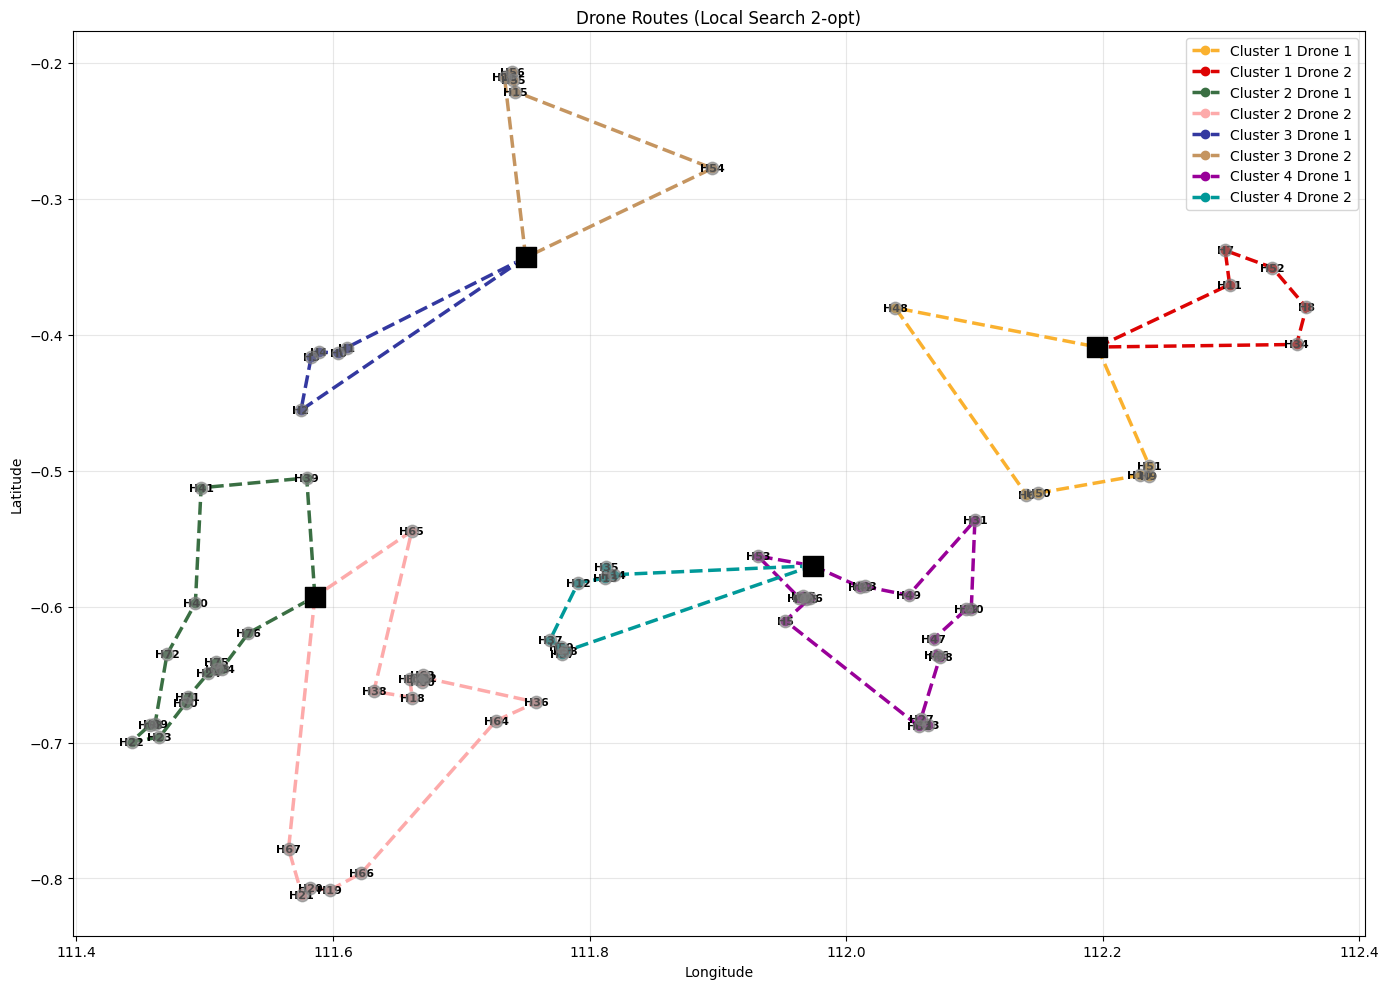

In [3]:
from ls import *

road_points = {
    0: (-0.409011175, 112.1958254),   # Cluster 1
    1: (-0.592699463, 111.5859392),   # Cluster 2
    2: (-0.343085986, 111.7502586),   # Cluster 3 (Depo Utama BPBD)
    3: (-0.569912205, 111.9740824)    # Cluster 4
}

#Initialize the routing class
n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="hotspot_clustered_2.csv",
    road_points=road_points,
    n_drones=n_drones
)

routes_opt = routing.optimize_all_clusters_bayesian(
        max_iterations=926,
        step_size=0.011382311226052936,
        n_restarts=1,
        neighbor_swap_rate=0.13377916158448003
    )

routing.print_cluster_routes(routes_opt)
# routing.melawi_visualize_cluster_routes(routes_opt)
routing.visualize_cluster_routes(routes_opt)